# INFO284 Machine Learning - Task 1

In [309]:
# Velger å bruke kNN, Logic regression og Decision tree model.
# Laster inn de nødvendige modulene for oppgaven

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import os

### Begrunnelse for valg av modellene

In this task, we are going to build three different machine learning models

The reason why we chose kNN is that it is an intuitive algorithm thats easy to work with, it also calculates quick. And the reason we chose Logistic Regression is that it also was similarily quick with calculation, and it can handle alot of functions. 

In [147]:
# Using the link for the sake of doing it easy. And adding names to the attributes, so it's easier understandable for everyone.
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
names = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 
         'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
         'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
         'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
mushrooms = pd.read_csv(url, names=names)

# Her lager vi en dataframe fordi vi får bruk for dette etterpå
df = pd.DataFrame(mushrooms)

mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [335]:
labelencoder = LabelEncoder()

mushrooms['class'] = labelencoder.fit_transform(mushrooms['class'])

# Encode the features
for col in mushrooms.columns[1:]:
    mushrooms[col] = labelencoder.fit_transform(mushrooms[col])

mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [336]:
# Print info about the dataset
print(mushrooms.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

In [341]:
# df = df.drop('veil-type', axis=1)

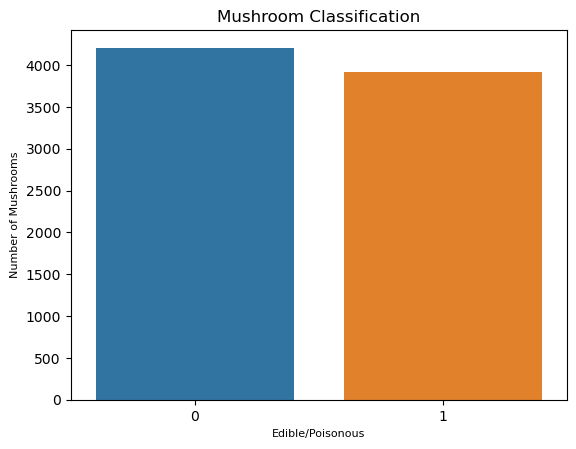

0    4208
1    3916
Name: class, dtype: int64


In [338]:
# Using plt to visualize the edibility of the mushrooms
sns.countplot(x='class', data=mushrooms)
plt.xlabel('Edible/Poisonous', fontsize=8)
plt.ylabel('Number of Mushrooms', fontsize=8)
plt.title('Mushroom Classification')
plt.show()

# This provides an exact number of how many edible (0) and how many poisonous (1) mushrooms there are. 
mushrooms.shape
count = mushrooms['class'].value_counts()
print(count)

In [275]:
# Define the parameter grid for grid search
param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}

# Create a kNN classifier
knn = KNeighborsClassifier()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=10)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best hyperparameters: {'n_neighbors': 1}
Best score: 0.9993846153846153


In [276]:
# Separerer dataen til training og testing sets fordi 
X = mushrooms.drop('class', axis=1)
y = mushrooms['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(6499, 22)
(6499,)
(1625, 22)
(1625,)


In [277]:
# Use 10-fold cross-validation to evaluate the model
scores = cross_val_score(knn, X, y, cv=10)

# Calculate mean and standard deviation of the cross-validation scores
mean_score = np.mean(scores)
std_score = np.std(scores)

print('Mean accuracy:', mean_score)
print('Standard deviation:', std_score)

Mean accuracy: 0.9463441974321221
Standard deviation: 0.10593545519797397


In [278]:
# Trener kNN modellen fordi
k = grid_search.best_params_['n_neighbors']
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=1)

In [279]:
# Predicter labels for test settet
y_pred = knn.predict(X_test)

In [280]:
# Kalkulerer accuracy til KNN modellen
accuracy = knn.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.9987692307692307


In [281]:
# Kalkulerer følgende; precision, recall, og F1-score på test data
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       852
           1       1.00      1.00      1.00       773

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Hva vi får ut av dette er blablabla blablabla blablabla blablabla blablabla blablabla blablabla blablabla 

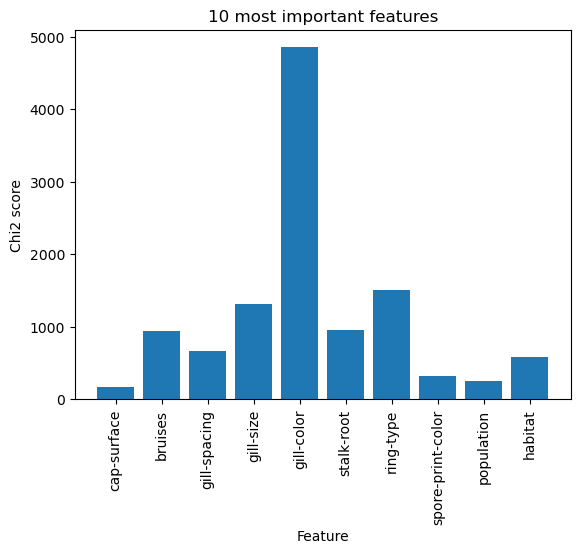

In [331]:
# Use SelectKBest and chi2 to find the 10 most important features
selector = SelectKBest(chi2, k=10)
selector.fit(X_train, y_train)
important_features = selector.get_support(indices=True)
feature_names = X.columns[important_features]

# Create a bar chart of the 10 most important features
plt.bar(range(len(feature_names)), selector.scores_[important_features])
plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Chi2 score')
plt.title('10 most important features')
plt.show()

### Logistic Regression Model

In [302]:
# Define the parameter grid for grid search
#param_grid = {'penalty': ['l1', 'l2'],
#              'C': [0.1, 1, 10],
#              'solver': ['liblinear']}

# Perform grid search to find the best hyperparameters
#grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=10)
#grid_search.fit(X, y)

# Print the best hyperparameters
#print("Best hyperparameters:", grid_search.best_params_)
#print("Best score:", grid_search.best_score_)

Since GridSearchCV takes such a long time to run, we have chosen to comment it out, for the sake of efficiency. 
The output is this;
"Best hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.9182899193523955"

In [306]:
# 10-fold cross-validation on the dataset
scores_lr = cross_val_score(lr, X, y, cv=10)

# Calculate mean and standard deviation of the cross-validation scores
mean_score_lr = np.mean(scores_lr)
std_score_lr = np.std(scores_lr)

print('Mean accuracy:', mean_score_lr)
print('Standard deviation:', std_score_lr)

Mean accuracy: 0.8803578245142057
Standard deviation: 0.12797132726984267


In [303]:
# Trener logistic regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [288]:
# Predicter labels for test settet
y_pred = lr.predict(X_test)

In [285]:
# Kalkulerer accuracy til Logistic regression modellen vår
accuracy = lr.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.952


In [304]:
# Calculate precision, recall, and F1-score on the test data
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       852
           1       0.96      0.94      0.95       773

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



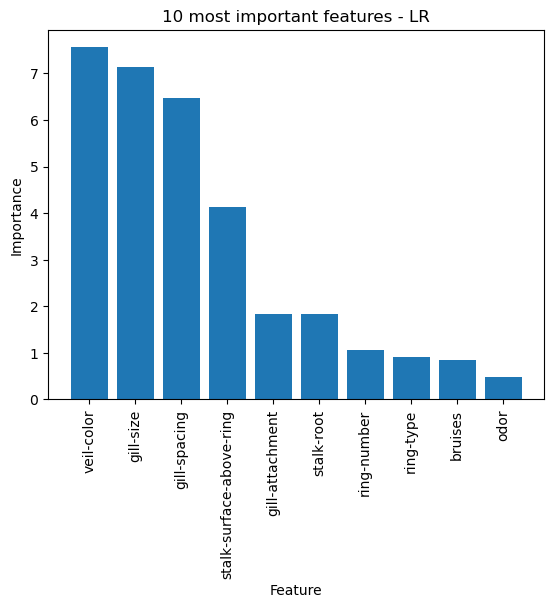

In [308]:
# Kode for å finne de 10 viktigste features - LR versjon.
importances = abs(lr.coef_[0])
sorted_idx = importances.argsort()[::-1]
important_features = sorted_idx[:10]
feature_names = X.columns[important_features]

# Create a bar chart of the 10 most important features
plt.bar(range(len(important_features)), importances[important_features])
plt.xticks(range(len(important_features)), feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('10 most important features - LR')
plt.show()

### Decision Tree Model

In [311]:
# Define the parameter grid for grid search
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 5, 10, 20, 50, 100],
              'min_samples_split': [2, 5, 10, 20, 50]}

# Create a decision tree classifier
dtc = DecisionTreeClassifier()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=10)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}
Best score: 1.0


In [315]:
# Perform 10-fold cross-validation on the decision tree classifier
scores_dtc = cross_val_score(dtc, X, y, cv=10)

mean_score_dtc = np.mean(scores_dtc)
std_score_dtc = np.std(scores_dtc)
print('Mean accuracy:', mean_score_dtc)
print('Standard deviation:', std_score_dtc)

Mean accuracy: 0.9603836062991171
Standard deviation: 0.09490172677361003


In [316]:
# Trener decision tree model
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [317]:
# Predicter labels for test settet
y_pred = dtc.predict(X_test)

In [141]:
# Kalkulerer accuracy til KNN modellen
accuracy = dtc.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 1.0


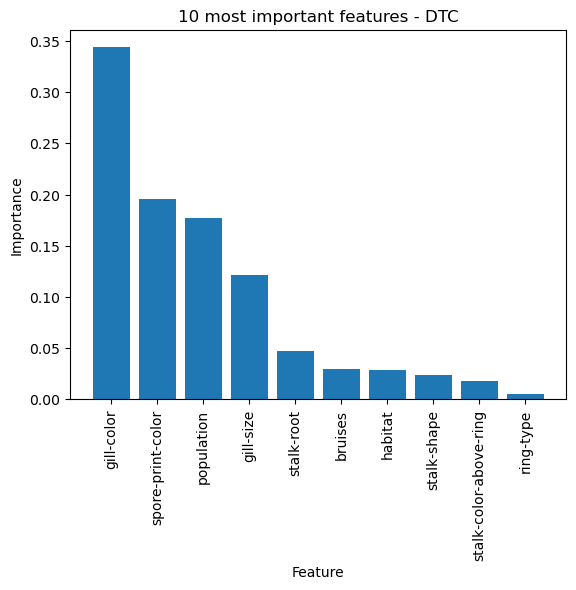

In [318]:
# Kode for å finne de 10 viktigste features - DTC versjon.
importances = dtc.feature_importances_
sorted_idx = importances.argsort()[::-1]
important_features = sorted_idx[:10]
feature_names = X.columns[important_features]

# Create a bar chart of the 10 most important features
plt.bar(range(len(important_features)), importances[important_features])
plt.xticks(range(len(important_features)), feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('10 most important features - DTC')
plt.show()

<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

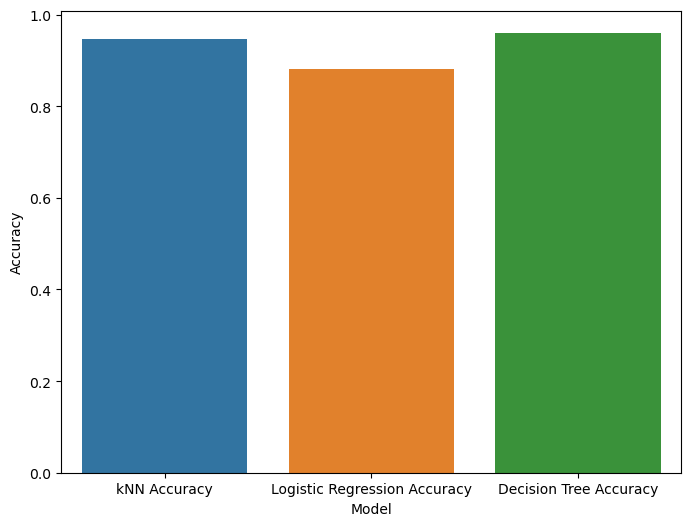

In [326]:
# Define the models and their scores
models = ['kNN Accuracy', 'Logistic Regression Accuracy', 'Decision Tree Accuracy']
mean_scores = [mean_score, mean_score_lr, mean_score_dtc]

# Create a dataframe with the model names and their accuracy scores
df = pd.DataFrame({'Model': models, 'Accuracy': mean_scores})

# Use Seaborn to create a bar chart of the accuracy scores
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=df)

In [332]:
# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Print the sizes of the three sets
print("Training set size:", len(X_train))
print("Validation set size:", len(X_valid))
print("Test set size:", len(X_test))

Training set size: 4874
Validation set size: 1625
Test set size: 1625


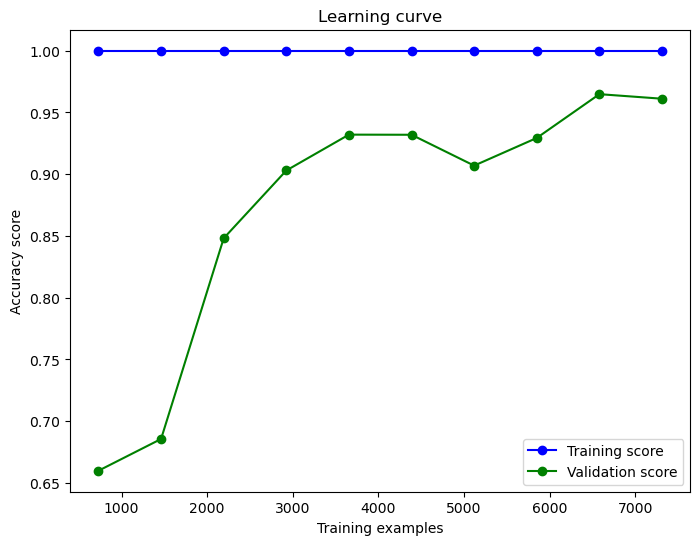

In [333]:
from sklearn.model_selection import learning_curve

# Define the model
model = DecisionTreeClassifier()

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=10, train_sizes=np.linspace(.1, 1.0, 10), scoring='accuracy')

# Plot the learning curve
plt.figure(figsize=(8,6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='blue', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color='green', label='Validation score')
plt.title('Learning curve')
plt.xlabel('Training examples')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()